# Patterns of Prestige: Uncovering the Hidden Stories Behind the Nobel Prize

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

## Setup

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_nobel = pd.read_csv('data/nobel.csv')
df_nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Nobel Prize Power Players: Gender & Country Trends

When the same gender or country appears again and again among Nobel laureates, it’s not just coincidence—it’s culture, history, and power converging. These patterns tell us who has traditionally had access to the tools of discovery, the networks of prestige, and the spotlight of global recognition. They whisper stories about which voices have been amplified and which have been left out. Behind every count is a legacy of opportunity—or its absence. And in that repetition, we begin to see not just who wins, but why.

In [93]:
# Gender counts
gender_counts = df_nobel['sex'].value_counts()

# Top gender
top_gender = gender_counts.idxmax()
top_gender_count = gender_counts.max()

# Country counts
country_counts = df_nobel['birth_country'].value_counts()

# Top birth country
top_country = country_counts.idxmax()
top_country_count = country_counts.max()

# Individual gender counts
male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)

print (
    f"There were {male_count} male Nobel Prize winners compared to {female_count} female winners. "
    f"The gender with the highest number of awards was {top_gender}, with {top_gender_count} prizes.\n"
    f"The most common birth country among Nobel laureates was {top_country}, with {top_country_count} winners."
)


There were 905 male Nobel Prize winners compared to 65 female winners. The gender with the highest number of awards was Male, with 905 prizes.
The most common birth country among Nobel laureates was United States of America, with 291 winners.


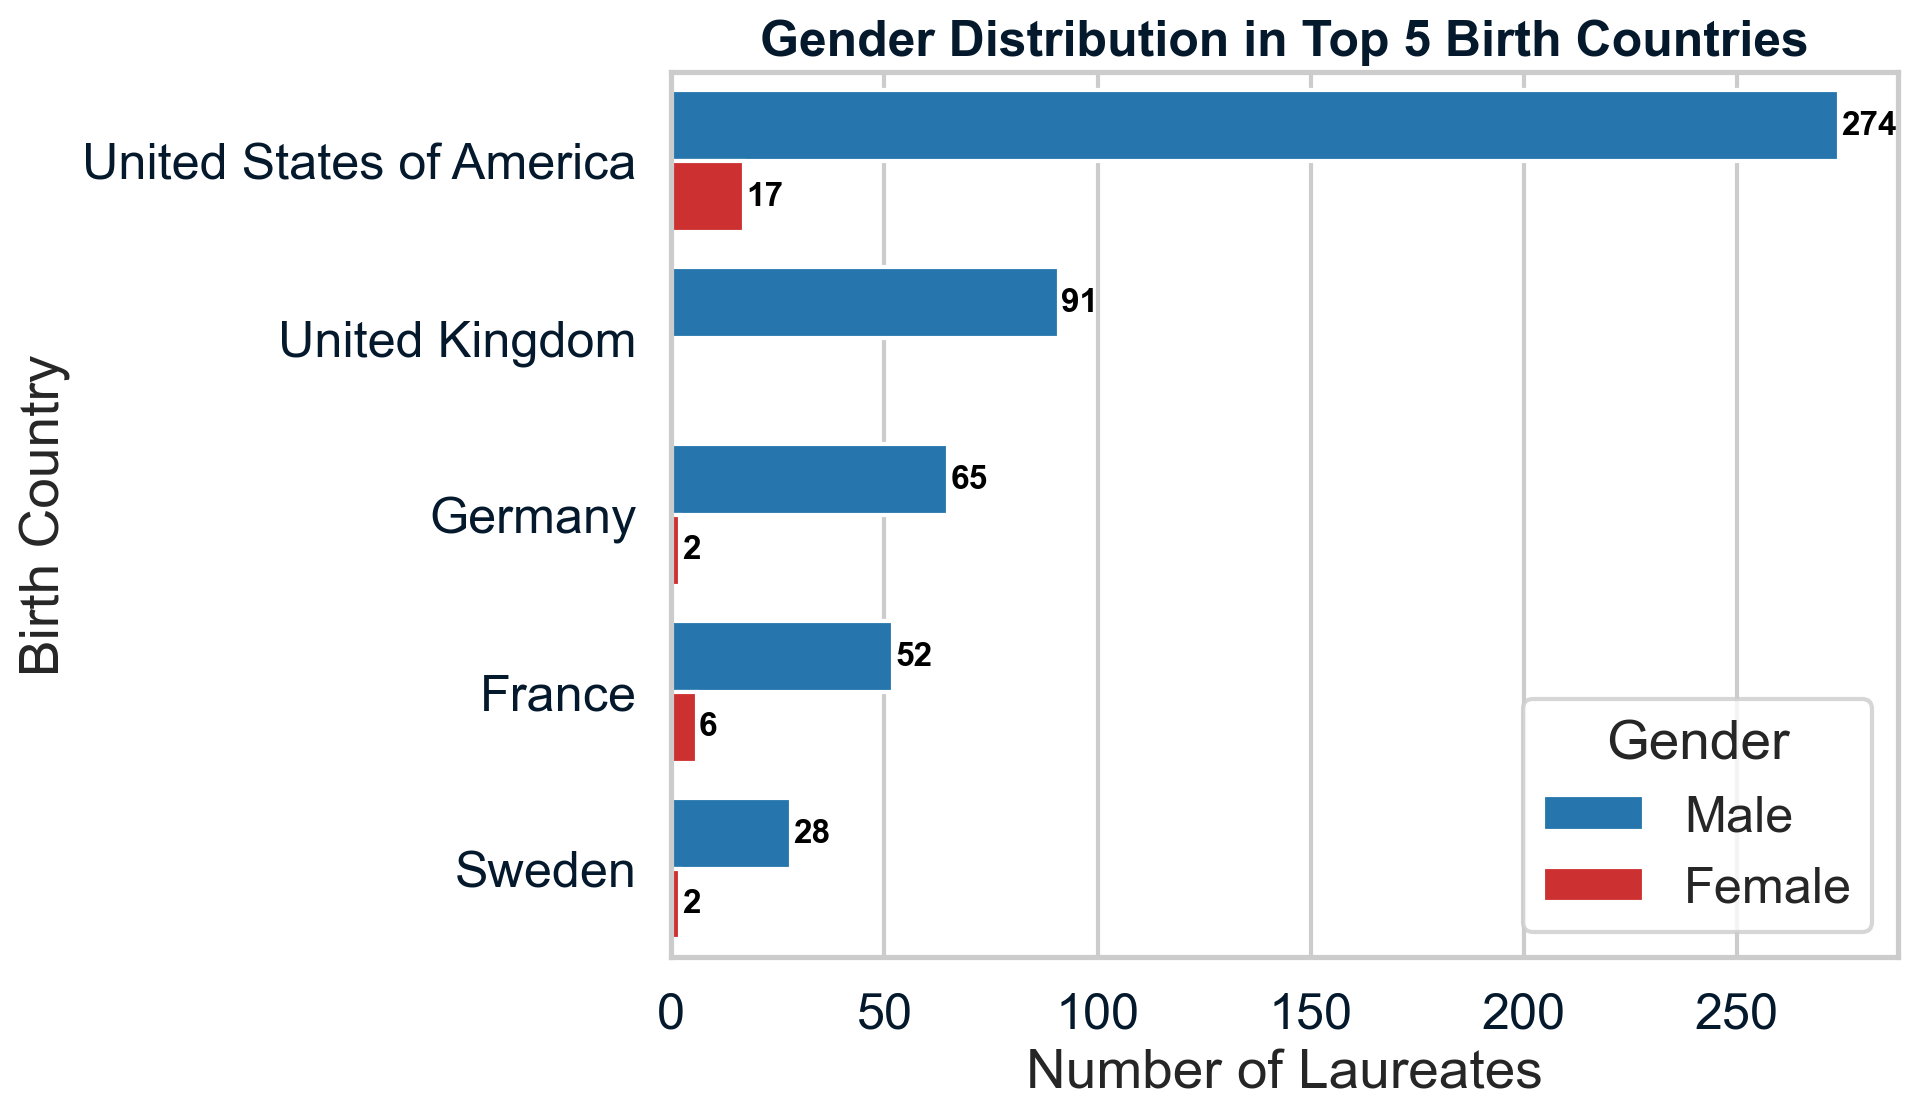

In [94]:
# Set style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)
custom_palette = {'Male': '#1f77b4', 'Female': '#d62728'}  # blue and red

# Filter top 5 birth countries by number of Nobel Prizes
top_five_countries = df_nobel['birth_country'].value_counts().nlargest(5).index
df_filtered = df_nobel[df_nobel['birth_country'].isin(top_five_countries)]

# Sort countries by total number of laureates (descending)
country_order = (
    df_filtered['birth_country']
    .value_counts()
    .loc[top_five_countries]
    .sort_values(ascending=False) 
    .index
)

# Plot setup
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='birth_country',
    data=df_filtered,
    hue='sex',
    palette=custom_palette,
    order=country_order,
    saturation=0.9
)

#Labels and title
plt.title("Gender Distribution in Top 5 Birth Countries", fontsize=18, weight='bold')
plt.xlabel("Number of Laureates")
plt.ylabel("Birth Country")

# Update legend title and labels
handles, labels = ax.get_legend_handles_labels()
new_labels = {'Male': 'Male', 'Female': 'Female'}
ax.legend(handles, [new_labels.get(label, label) for label in labels], title="Gender")

# Add annotations
for p in ax.patches:
    value = int(p.get_width())
    if value > 0:
        y_pos = p.get_y() + p.get_height() / 2
        x_pos = p.get_width()
        ax.text(
            x=x_pos + 0.5, y=y_pos,
            s=f'{value}',
            ha='left', va='center',
            fontsize=12, fontweight='bold', color='black'
        )

plt.tight_layout()
plt.show()


The data show clear historical and geographical imbalances among Nobel Prize winners. There were 905 male laureates compared to only 65 female laureates, reflecting long-standing barriers to women’s participation in higher education, research funding, and senior academic positions. Male-dominated nomination networks further reinforced this bias.

Geography shows a similar concentration of privilege: the most common birth country among Nobel laureates is the United States (291 winners), illustrating how scientific infrastructure, funding, and global visibility in Western nations have historically amplified their share of Nobel recognition. Together, these patterns highlight how Nobel Prizes have mirrored broader inequalities in access, opportunity, and recognition rather than purely differences in talent.

# A Century of Expansion: More Prizes, More U.S. Influence

The sharp rise in U.S.-born Nobel Prize winners during the 2000s reflects decades of investment in research infrastructure, higher education, and global scientific collaboration. By the end of the 20th century, the U.S. had established itself as the dominant hub for innovation, attracting top talent worldwide. At the same time, the total number of Nobel Prizes awarded per decade has grown steadily, as new categories and subfields emerged and the scale of global research expanded. Together, these trends reveal how historical funding priorities, immigration of scientists, and the globalization of research have amplified both the visibility and quantity of laureates over time.

In [95]:
#Finding ratio
df_nobel['decade'] = (df_nobel['year'] // 10) * 10
usa_ratio = df_nobel[df_nobel['birth_country'] == 'United States of America'].groupby('decade').size() / df_nobel.groupby('decade').size()
max_decade_usa = usa_ratio.idxmax()

print(
        f"The United States of America had its strongest Nobel Prize presence in the {max_decade_usa}s, "
    f"with the highest ratio of US-born laureates compared to global winners across all categories. "
    f"That decade marked a peak in American scientific and cultural influence on the world stage."
)

The United States of America had its strongest Nobel Prize presence in the 2000s, with the highest ratio of US-born laureates compared to global winners across all categories. That decade marked a peak in American scientific and cultural influence on the world stage.


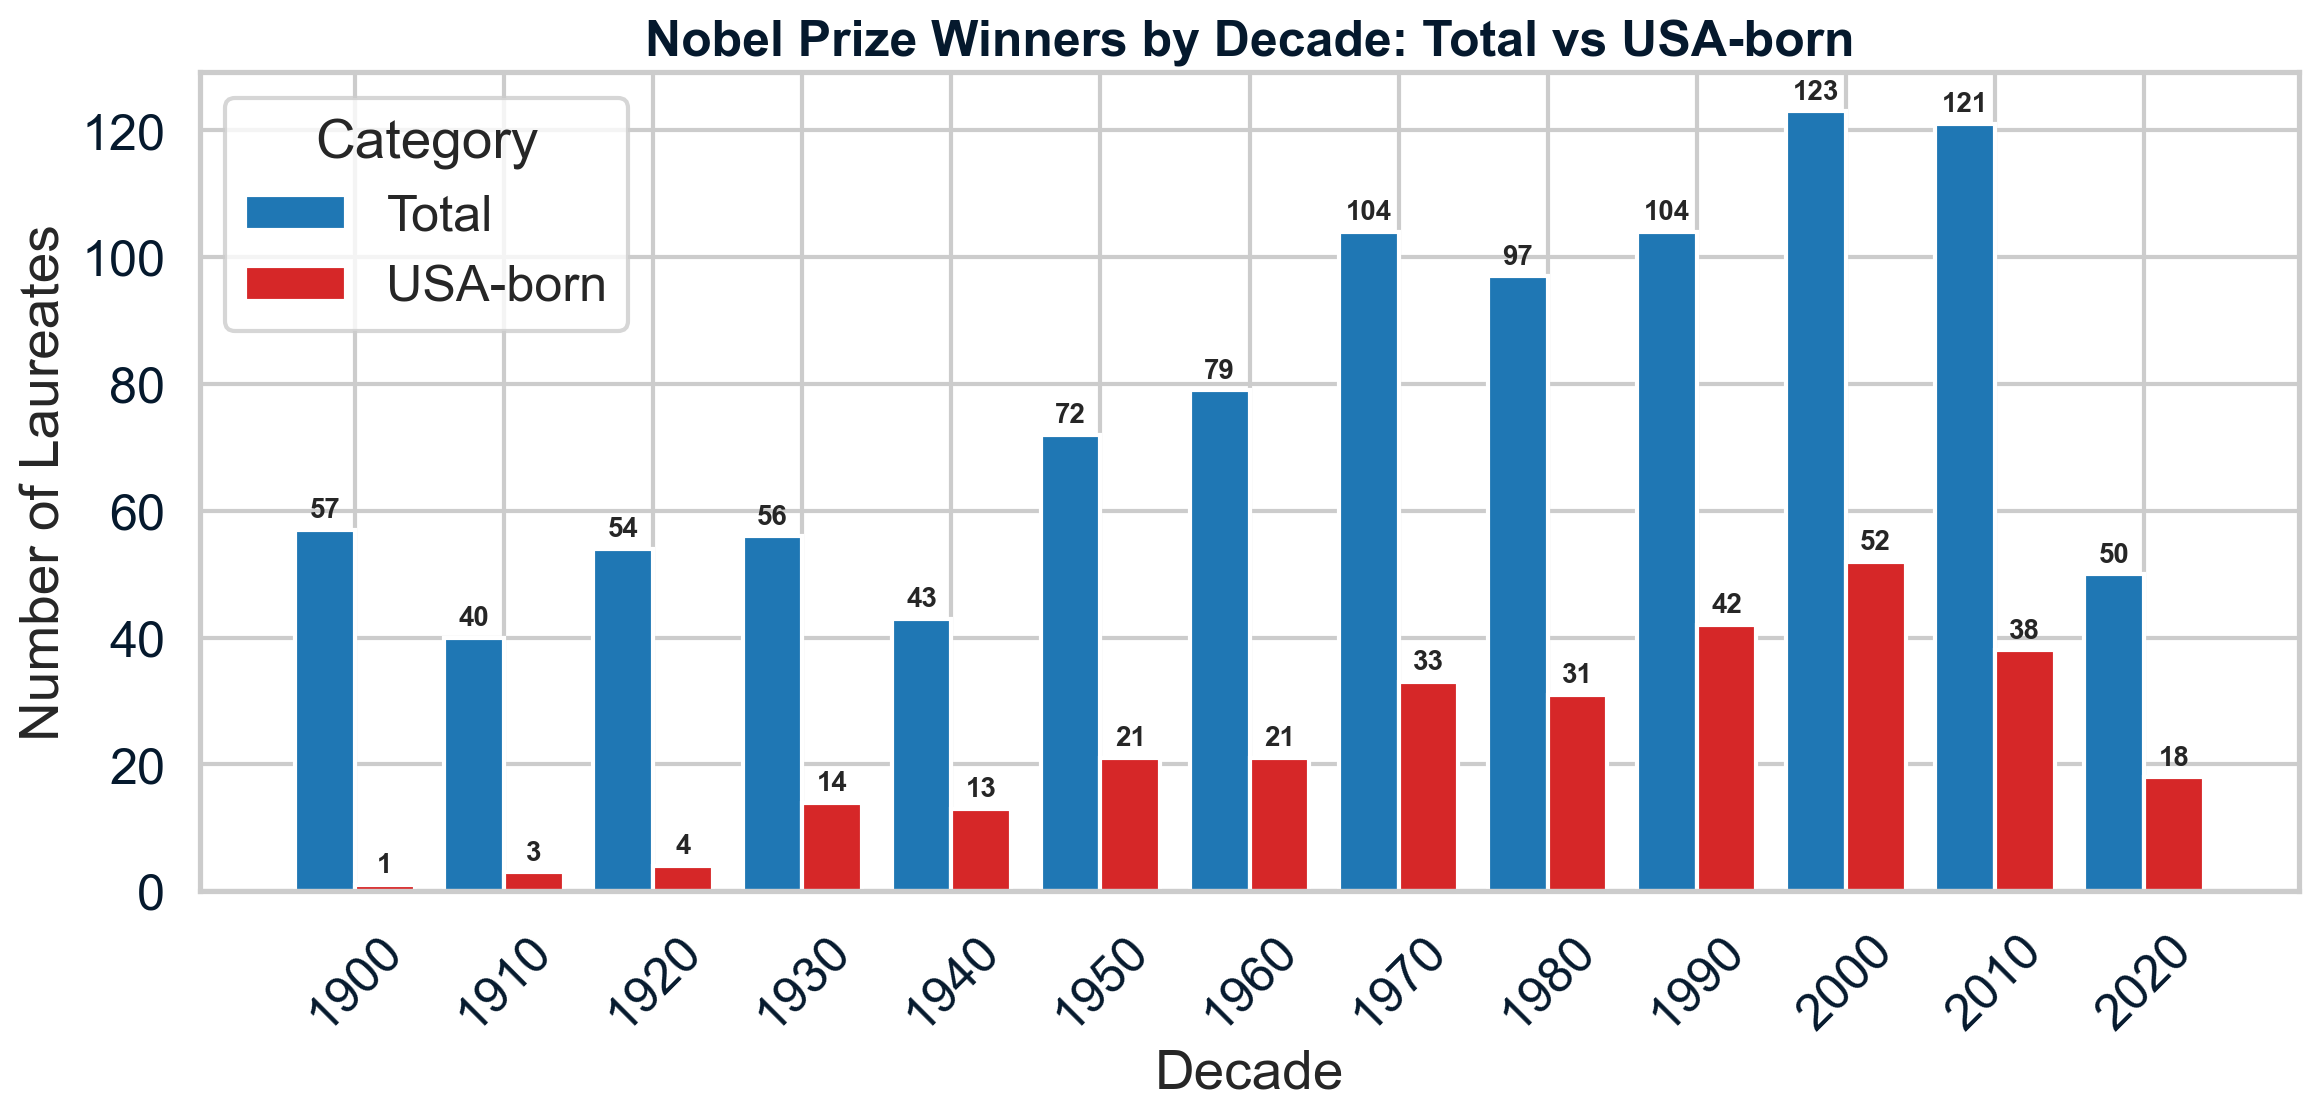

In [96]:
# Create 'decade' column
df_nobel['decade'] = (df_nobel['year'] // 10) * 10

# Count total laureates per decade
total_by_decade = df_nobel.groupby('decade').size()

# Count US-born laureates per decade
usa_by_decade = df_nobel[df_nobel['birth_country'] == 'United States of America'].groupby('decade').size()

# Combine into a DataFrame
df_grouped = pd.DataFrame({
    'Total': total_by_decade,
    'USA': usa_by_decade
}).fillna(0).astype(int)

# Set style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

# Plot setup
decades = df_grouped.index.astype(str)
x = range(len(decades))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], df_grouped['Total'], width=width, label='Total', color='#1f77b4')
plt.bar([i + width/2 for i in x], df_grouped['USA'], width=width, label='USA-born', color='#d62728')

# Add annotations
for i in x:
    total = df_grouped['Total'].iloc[i]
    usa = df_grouped['USA'].iloc[i]
    plt.text(i - width/2, total + 1, str(total), ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + width/2, usa + 1, str(usa), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xticks(x, decades, rotation=45)
plt.xlabel("Decade")
plt.ylabel("Number of Laureates")
plt.title("Nobel Prize Winners by Decade: Total vs USA-born", fontsize=18, weight='bold')
plt.legend(title="Category")
plt.tight_layout()
plt.show()



## End of an Era? Beginning of Another?
Yet, the most recent decade hints at a subtle shift. While the United States continues to lead in total Nobel laureates, its dominance is no longer growing at the same pace. Emerging scientific powers—particularly in Europe and Asia—are beginning to challenge the long-standing hierarchy. Countries like China, with massive investments in research and development, are positioning themselves as future contenders for global recognition. This deceleration invites a deeper question: will the U.S. remain the epicenter of Nobel-worthy innovation, or are we witnessing the rise of a more multipolar landscape in scientific excellence? The data suggests that the next century of Nobel history may look very different from the last.

# Breaking Barriers: Women’s Growing Presence in the Nobel Prizes

For much of Nobel history, female laureates were the exception, not the rule. But over time, quiet revolutions in classrooms, laboratories, and policy halls began to shift the landscape. The growing presence of women in the Nobel ranks is not just a statistical change—it’s a reflection of decades of struggle, advocacy, and transformation. By zooming into the data, we can see where progress has taken root and where resistance still lingers. Some fields remain stubbornly unequal, while others show signs of breakthrough. This moment invites us to ask: where has inclusion gained ground, and where is it still waiting to be written?

In [97]:
#Finding ratio
female_ratio = df_nobel[df_nobel['sex'] == 'Female'].groupby(['decade', 'category']).size() / df_nobel.groupby(['decade', 'category']).size()
max_female = female_ratio.idxmax()
max_female_dict = {max_female[0]: max_female[1]}

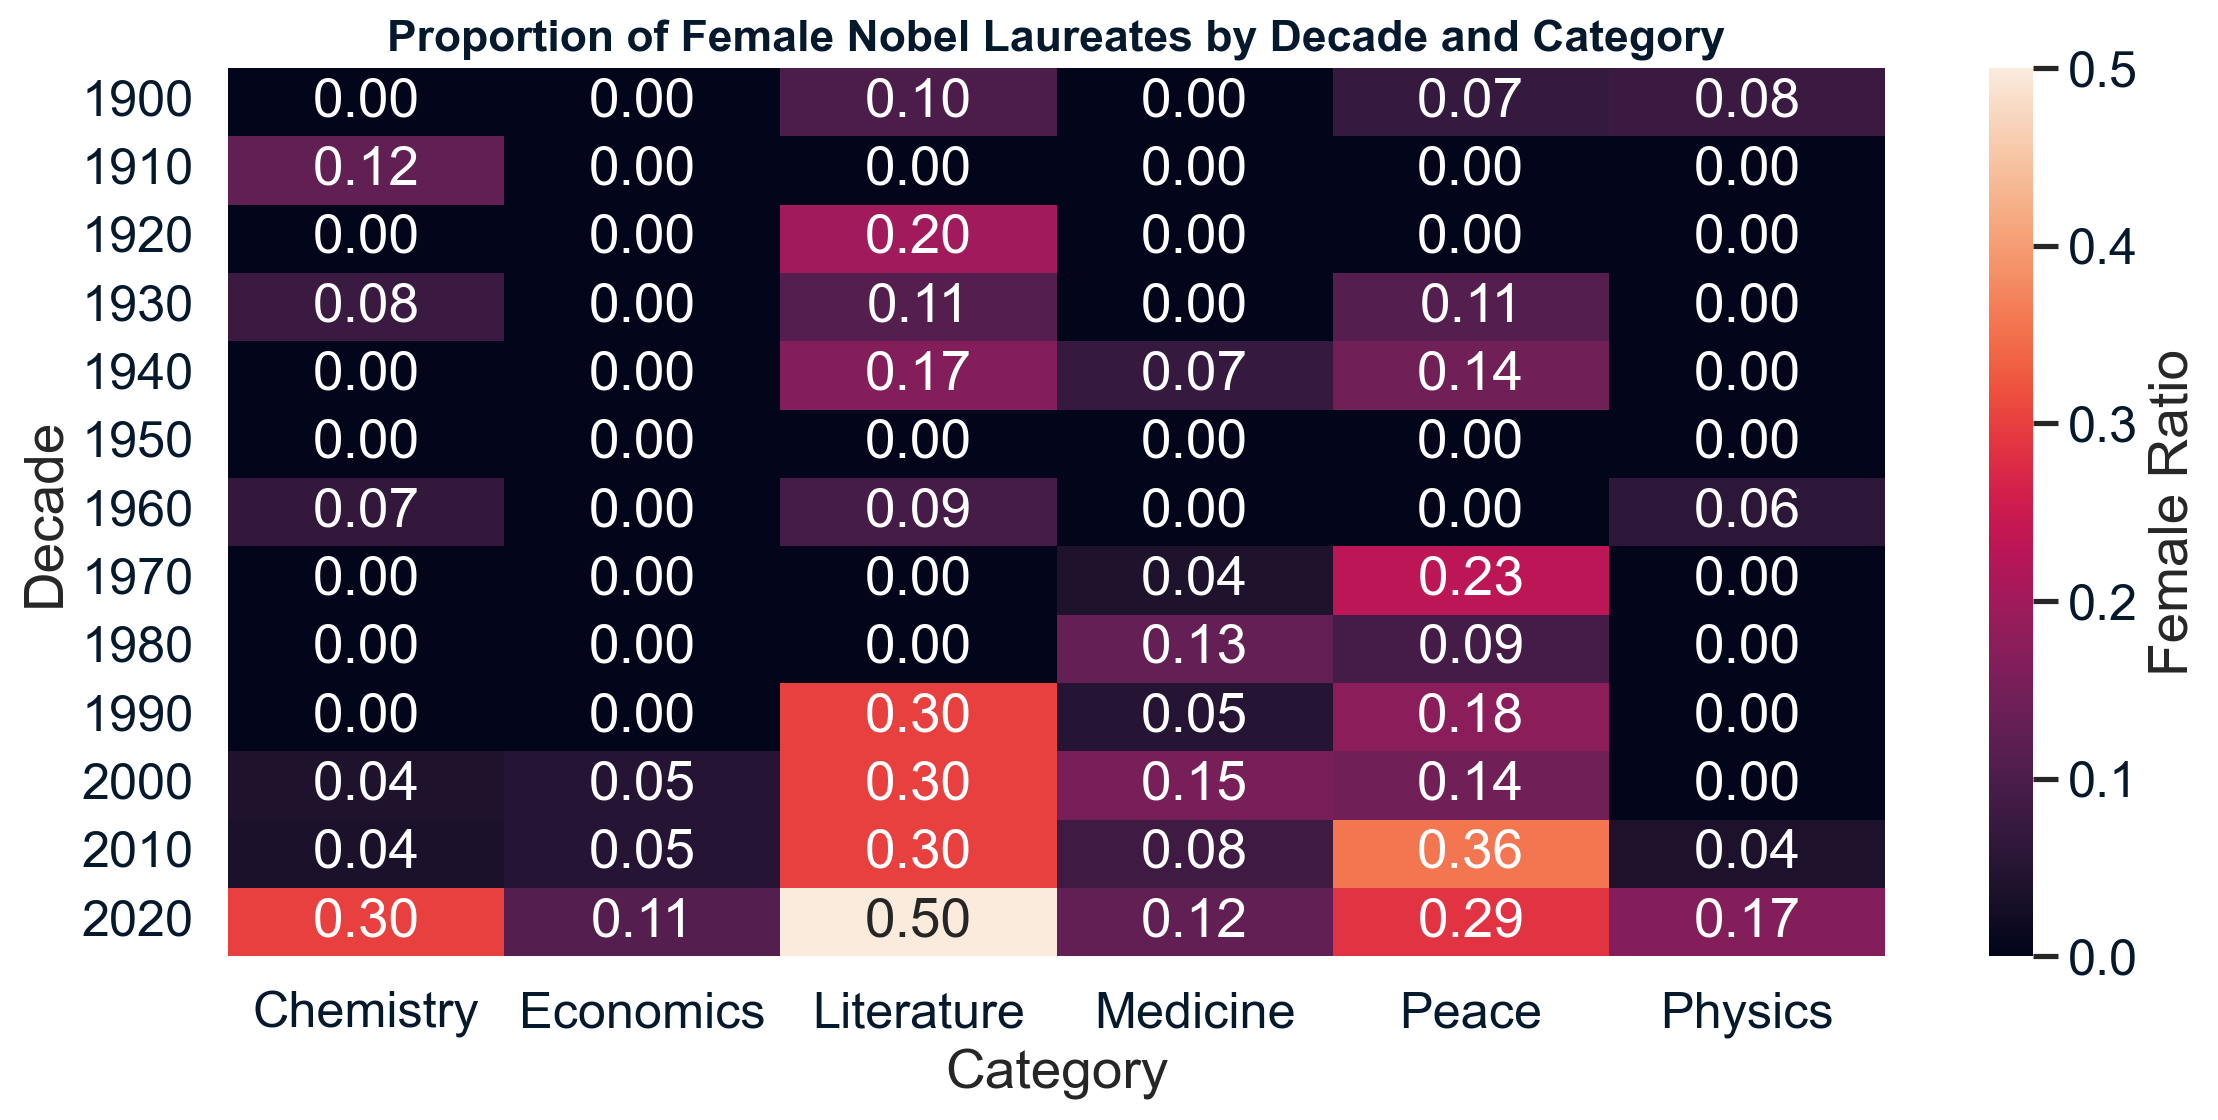

In [98]:
# Pivot table for heatmap
heatmap_data = female_ratio.unstack().fillna(0)

# Plot setup
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="rocket", cbar_kws={'label': 'Female Ratio'})
plt.title("Proportion of Female Nobel Laureates by Decade and Category", fontsize=16, weight='bold')
plt.xlabel("Category")
plt.ylabel("Decade")
plt.tight_layout()
plt.show()

## Visible, But Not Equal: Gender Gaps Beneath the Nobel Spotlight

The highest proportion of female Nobel laureates appeared in the 2000s, signaling the cumulative effect of decades of advocacy for gender equality in education, research funding, and professional opportunities. This rise reflects not only a gradual dismantling of institutional barriers but also greater visibility and recognition of women’s scientific and humanitarian contributions. However, the heatmap also reveals that fields like Chemistry, Physics, and Economics continue to show the lowest female ratios — a legacy of entrenched gender gaps in STEM disciplines and slower institutional change in traditionally male-dominated areas.

# Marie Curie: The Dawn of a New Era
Marie Curie was the first woman ever to receive a Nobel Prize, winning in Chemistry. Her groundbreaking research on radioactivity not only transformed modern science but also shattered the gender barrier in one of the world’s most prestigious awards. Curie’s achievement paved the way for future generations of women scientists, demonstrating that excellence in discovery transcends gender and setting a historic precedent for inclusion in the Nobel tradition.

In [99]:
curie = df_nobel[df_nobel['sex'] == 'Female'].sort_values('year')
first_woman_name = curie['full_name'].iloc[0]
first_woman_category = curie['category'].iloc[0]
print(
    f"{first_woman_name} became the first female Nobel laureate in {first_woman_category}. "
    f"Since then, the number of women recognized has steadily increased, as shown in the timeline below."
)

Marie Curie, née Sklodowska became the first female Nobel laureate in Physics. Since then, the number of women recognized has steadily increased, as shown in the timeline below.


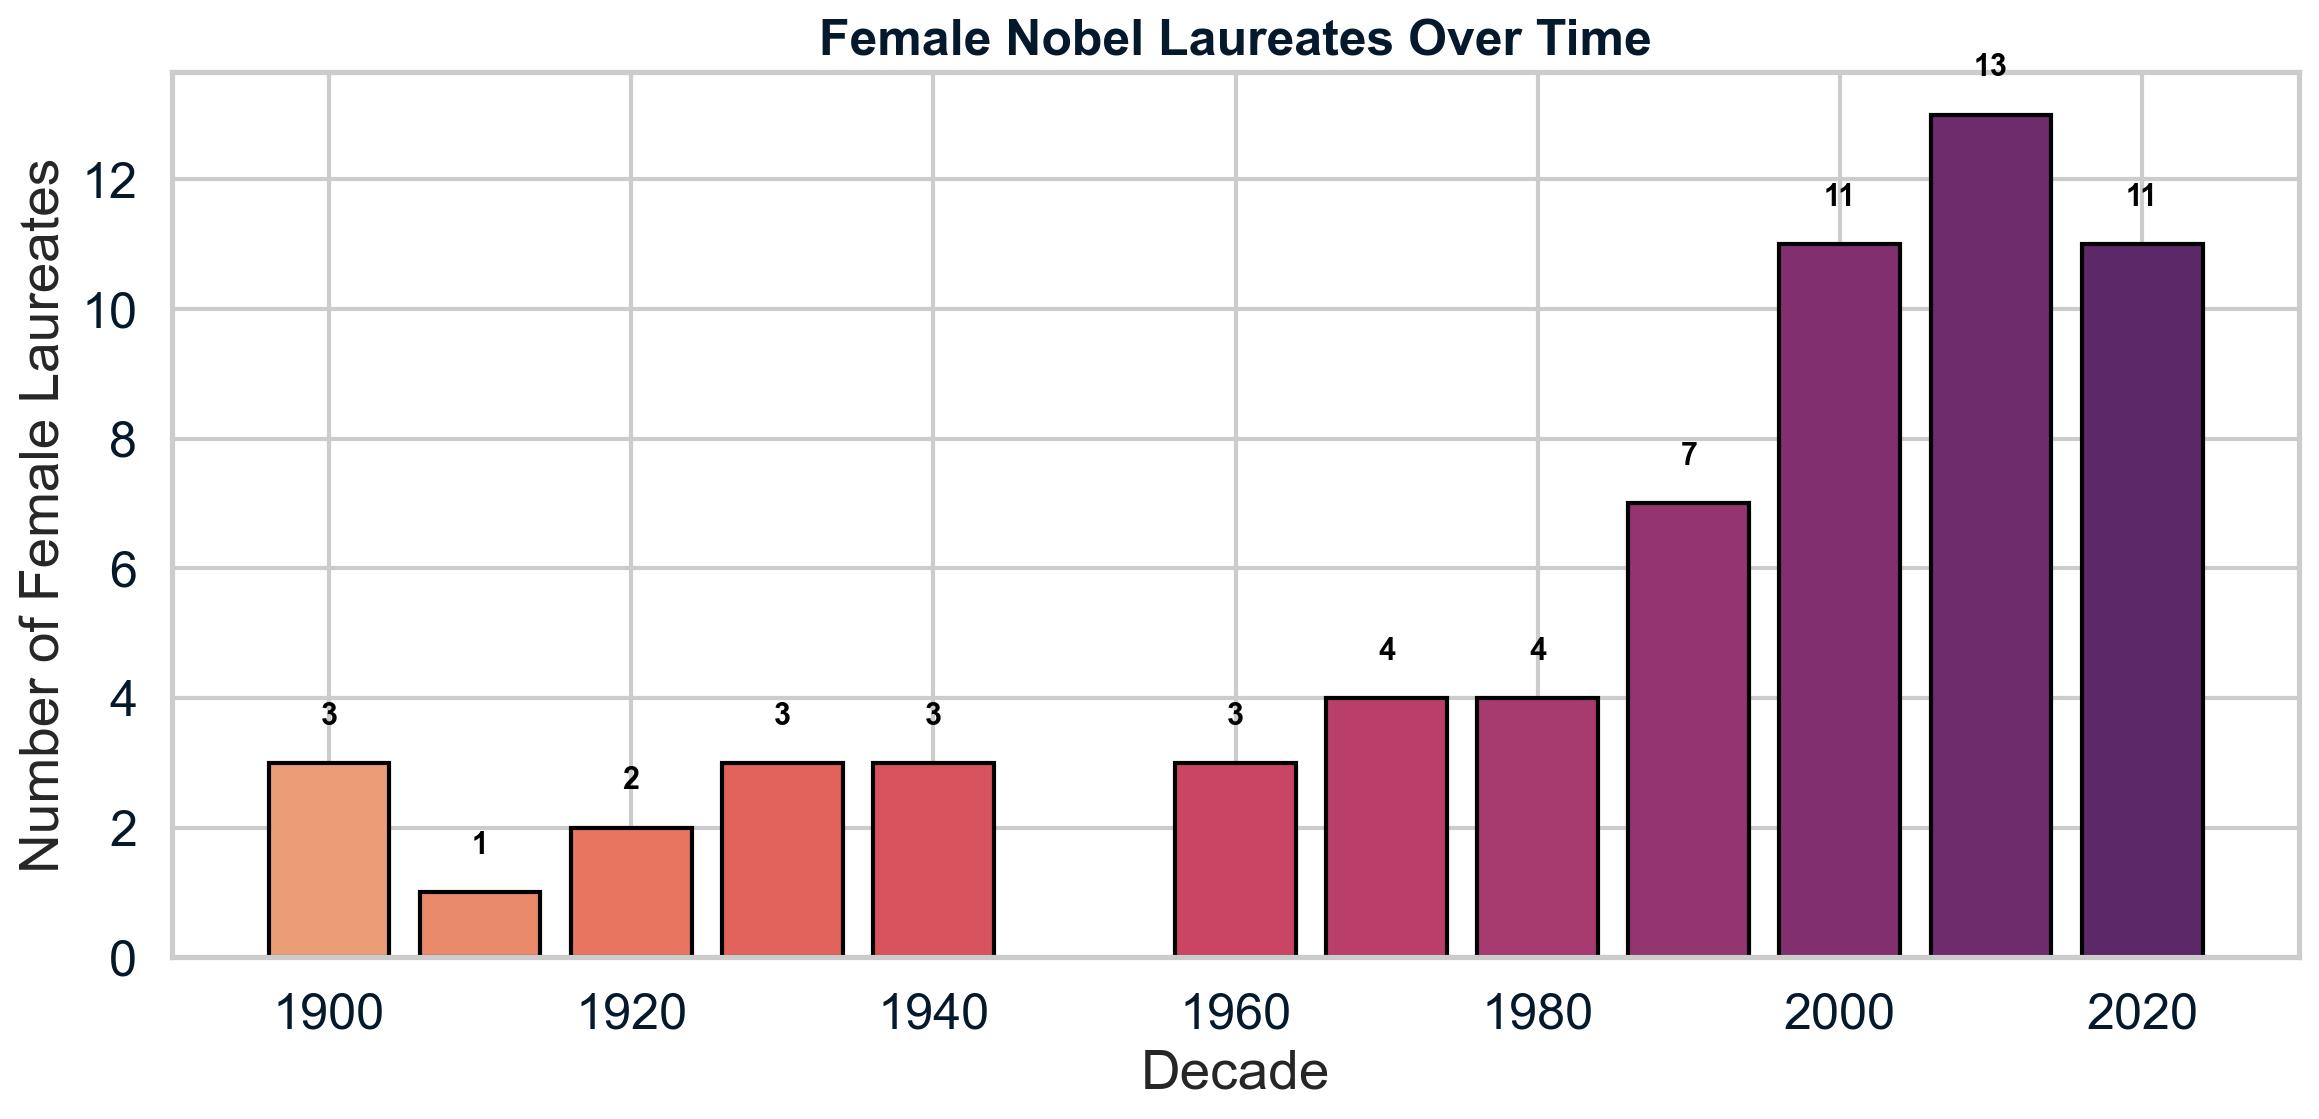

In [100]:
# DataFrame Female
df_female = df_nobel[df_nobel['sex'] == 'Female']

female_by_decade = df_female['decade'].value_counts().sort_index()

# Set style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)

#Plot setup
colors = sns.color_palette("flare", n_colors=len(female_by_decade))

plt.figure(figsize=(12, 6))
bars = plt.bar(female_by_decade.index, female_by_decade.values, color=colors, width=8, edgecolor='black')

# Labels and title
plt.title("Female Nobel Laureates Over Time", fontsize=18, weight='bold')
plt.xlabel("Decade")
plt.ylabel("Number of Female Laureates")

# Add annotations
for bar in bars:
    height = int(bar.get_height())
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()

From a solitary breakthrough in the early 1900s to a growing chorus of recognition, the presence of women among Nobel laureates has evolved dramatically over the past century. Each decade tells a story of persistence, progress, and the gradual dismantling of barriers that once kept female brilliance in the shadows. What began as an exception has become a rising pattern—proof that talent, discovery, and impact are not bound by gender. This upward trajectory reflects not just individual achievements, but a broader cultural shift toward inclusion and visibility in the highest echelons of global recognition.

# Beyond One: The Rare Circle of Repeat Nobel Laureates

Winning a Nobel Prize is a rare honor—but winning it more than once places an individual or organization in an extraordinary league. These repeat laureates stand out not only for their brilliance, but for their sustained impact across time, disciplines, or causes. Whether advancing peace, deepening scientific understanding, or reshaping literature, their names echo through history as symbols of enduring excellence. This list reveals the select few whose contributions have been recognized multiple times by the world’s most prestigious award.

In [101]:
#Count how many times each full name appears
repeat_counts = df['full_name'].value_counts()

# Filter names with more than one Nobel Prize
repeat_list = repeat_counts[repeat_counts > 1].index.tolist()

# Print formatted message with counts
print(
    f"A total of {len(repeat_list)} individuals or organizations have received more than one Nobel Prize.\n"
    f"Here are the repeat laureates:\n"
    + "\n".join([f"- {name} ({repeat_counts[name]} prizes)" for name in repeat_list])
)

A total of 6 individuals or organizations have received more than one Nobel Prize.
Here are the repeat laureates:
- Comité international de la Croix Rouge (International Committee of the Red Cross) (3 prizes)
- Linus Carl Pauling (2 prizes)
- John Bardeen (2 prizes)
- Frederick Sanger (2 prizes)
- Marie Curie, née Sklodowska (2 prizes)
- Office of the United Nations High Commissioner for Refugees (UNHCR) (2 prizes)


# Conclusion
This project offers more than just numbers—it reveals the evolving narrative of global recognition. From the dominance of male laureates and US-born winners to the slow but steady rise of female representation, each insight reflects broader social, political, and scientific shifts. By identifying repeat winners, pioneering women, and decade-level trends, the analysis paints a dynamic portrait of excellence across time. The Nobel Prize, often seen as the pinnacle of achievement, becomes here a lens through which we explore inclusion, legacy, and the changing face of merit. This repository invites readers not only to observe patterns, but to question what they mean—and what they might look like in the future.